In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA

In [62]:
def plot_cumulative_variance(pca):
    P = []
    for p in pca.explained_variance_ratio_:
        if len(P)==0:
            P.append(p)
        else:
            P.append(P[-1]+p)
    plt.plot(P)
    plt.show()
    return P

def get_transformed_data():
    df = pd.read_csv("train.csv")
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    
    X = data[:,1:]
    y = data[:,0].astype(np.int32)
    
    pca = PCA()
    mu = X.mean(axis=0)
    X = X - mu
    Z = pca.fit_transform(X)
    
    plot_cumulative_variance(pca)
    
    return Z, y, pca, mu

In [10]:
pca = PCA()
pca.
df = pd.read_csv("train.csv")


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
t = df.as_matrix().astype(np.float32)
np.random.shuffle(t)

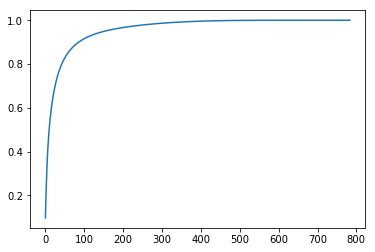

In [63]:
X = get_transformed_data()

In [61]:
X.mean(axis=0)
np.std(X,axis=0)

AttributeError: 'tuple' object has no attribute 'mean'

True

In [26]:
+

['asdad', '.*asdad']

In [27]:
a.remove("asdad")

In [28]:
a

['.*asdad']

['a', 'a']

['a', 'a']

<function __main__.<lambda>>

[6, 9, 12, 15, 18, 21, 24]

-12